## Import

In [46]:
from types import NoneType

import pandas as pd
import numpy as np

df = pd.read_csv('covid_combined_data.csv')
df['date_in_datetime'] = pd.to_datetime(df['date'])
countries_df = pd.read_csv('countries_combined_data.csv')

In [48]:
df.head()

,location_key,subregion1_code_x,subregion1_name_x,date,country_name_x,new_confirmed,cumulative_confirmed,new_tested,cumulative_tested,subregion1_code_y,...,subregion1_code,subregion1_name,country_name,new_persons_vaccinated,cumulative_persons_vaccinated,new_persons_fully_vaccinated,cumulative_persons_fully_vaccinated,new_vaccine_doses_administered,cumulative_vaccine_doses_administered,date_in_datetime
0,AR_U,U,Chubut,2021-06-03,Argentina,352,65456,647,127262,U,...,U,Chubut,Argentina,1157,54564,413,18606,1570,73170,2021-06-03
1,IN_AS,AS,Assam,2021-06-25,India,2793,496481,139105,14339556,AS,...,AS,Assam,India,158705,5536768,17540,1152586,176245,6689354,2021-06-25
2,MY_02,02,Kedah,2022-01-24,Malaysia,395,174374,8098,1321133,02,...,02,Kedah,Malaysia,74,1596945,257,1577276,8236,3714419,2022-01-24
3,US_DE,DE,Delaware,2021-11-04,United States of America,276,145284,1121,433596,DE,...,DE,Delaware,United States of America,282,676753,119,585615,190,1323940,2021-11-04
4,FR_PAC,PAC,Provence-Alpes-Côte d'Azur,2021-11-05,France,865,757955,37314,16882909,PAC,...,PAC,Provence-Alpes-Côte d'Azur,France,2486,3635163,3321,3526206,5807,7161369,2021-11-05


In [4]:
df.describe()
df['subregion1_code_x'].isna().sum()

25420

In [5]:
countries_df.head()

,location_key_x,subregion1_code_x,subregion1_name_x,country_code,country_name,iso_3166_1_alpha_2,iso_3166_1_alpha_3,population,population_male,population_female,...,gdp_2007,gdp_2008,gdp_2009,gdp_2010,gdp_2011,gdp_2012,gdp_2013,gdp_2014,gdp_2015,gdp_2016
0,BW,NaN,NaN,BW,Botswana,BW,BWA,2351625,1139099,1212526,...,1.093905e+10,1.094507e+10,1.026713e+10,1.278665e+10,1.568293e+10,1.468628e+10,1.491578e+10,1.625945e+10,1.443057e+10,1.558114e+10
1,EC,NaN,NaN,EC,Ecuador,EC,ECU,17643060,8823827,8819233,...,5.100778e+10,6.176264e+10,6.251969e+10,6.955537e+10,7.927666e+10,8.792454e+10,9.512966e+10,1.017263e+11,9.929038e+10,9.861397e+10
2,GQ,NaN,NaN,GQ,Equatorial Guinea,GQ,GNQ,1402985,780380,622605,...,1.307172e+10,1.974989e+10,1.502780e+10,1.629854e+10,2.132940e+10,2.238963e+10,2.194260e+10,2.173650e+10,1.259721e+10,1.068480e+10
3,GY,NaN,NaN,GY,Guyana,GY,GUY,786559,395549,391010,...,1.740335e+09,1.922598e+09,2.061324e+09,2.273225e+09,2.576024e+09,2.861562e+09,2.987684e+09,3.077643e+09,3.197225e+09,3.502397e+09
4,IT,NaN,NaN,IT,Italy,IT,ITA,60359546,29384766,30974780,...,2.203053e+12,2.390729e+12,2.185160e+12,2.125058e+12,2.276292e+12,2.072823e+12,2.130491e+12,2.151733e+12,1.832347e+12,1.858913e+12


In [6]:
countries_df.describe()

,subregion1_code_x,subregion1_name_x,population,population_male,population_female,population_density_x,human_development_index,gdp_usd,gdp_per_capita_usd,latitude,...,gdp_2007,gdp_2008,gdp_2009,gdp_2010,gdp_2011,gdp_2012,gdp_2013,gdp_2014,gdp_2015,gdp_2016
count,0.0,0.0,1.370000e+02,1.370000e+02,1.370000e+02,137.000000,137.000000,1.370000e+02,137.000000,137.000000,...,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02,1.360000e+02
mean,NaN,NaN,4.739199e+07,2.399633e+07,2.337054e+07,239.992328,0.715438,4.324655e+11,15769.686131,17.835316,...,2.804792e+11,3.150346e+11,2.982958e+11,3.304192e+11,3.734704e+11,3.778555e+11,3.879545e+11,3.978471e+11,3.678356e+11,3.745047e+11
std,NaN,NaN,1.725282e+08,8.893505e+07,8.361013e+07,763.884667,0.152899,1.408638e+12,20401.665167,25.185132,...,7.114949e+11,7.966928e+11,7.910842e+11,8.735504e+11,1.000325e+12,1.044687e+12,1.079501e+12,1.135234e+12,1.127300e+12,1.155853e+12
min,NaN,NaN,7.199100e+04,3.504100e+04,3.629800e+04,2.110000,0.354000,5.960333e+08,261.000000,-41.200000,...,4.213759e+08,4.581902e+08,4.890743e+08,4.938244e+08,5.010253e+08,4.859980e+08,5.019793e+08,5.236663e+08,5.350958e+08,5.814840e+08
25%,NaN,NaN,2.961161e+06,1.606609e+06,1.498593e+06,25.759000,0.591000,1.418044e+10,2229.000000,1.300000,...,7.880509e+09,8.496966e+09,8.621574e+09,1.000367e+10,1.151839e+10,1.229277e+10,1.258212e+10,1.278608e+10,1.169229e+10,1.101091e+10
50%,NaN,NaN,1.023018e+07,5.165979e+06,5.096935e+06,91.000000,0.741000,5.604591e+10,6977.000000,17.000000,...,2.674387e+10,3.186255e+10,3.547712e+10,3.841963e+10,4.226270e+10,4.386857e+10,4.764821e+10,4.916577e+10,4.892188e+10,4.737364e+10
75%,NaN,NaN,3.286627e+07,1.677100e+07,1.606720e+07,213.783000,0.831000,2.823182e+11,19116.000000,38.500000,...,1.787067e+11,2.081816e+11,1.924084e+11,2.336095e+11,2.522520e+11,2.500921e+11,2.699801e+11,2.609903e+11,2.425179e+11,2.549993e+11
max,NaN,NaN,1.439324e+09,7.382473e+08,7.010764e+08,8357.633000,0.957000,1.434290e+13,116348.000000,65.000000,...,4.515265e+12,5.037908e+12,5.231383e+12,6.100620e+12,7.572554e+12,8.560547e+12,9.607224e+12,1.048237e+13,1.106467e+13,1.119915e+13


## Część 1

1. Wykonaj wykresy pudełkowe (ang.box plot), które pozwolą na graficzną identyfikację wartości odstających poprzez przedstawienie kwartyli i wartości skrajnych w danych dotyczących:

1.1. liczby nowych zachorowań

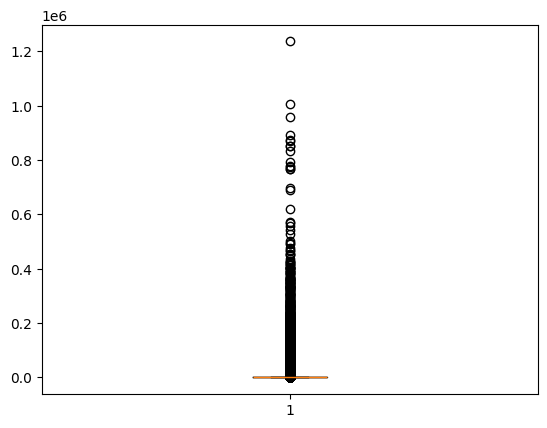

In [7]:
import matplotlib.pyplot as plt
plt.boxplot(df['new_confirmed'])
plt.show()

1.2. liczby nowych śmierci



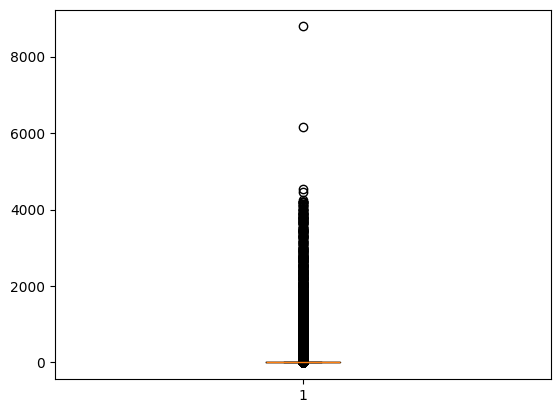

In [8]:
plt.boxplot(df['new_deceased'])
plt.show()

1.3. liczby nowych szczepień



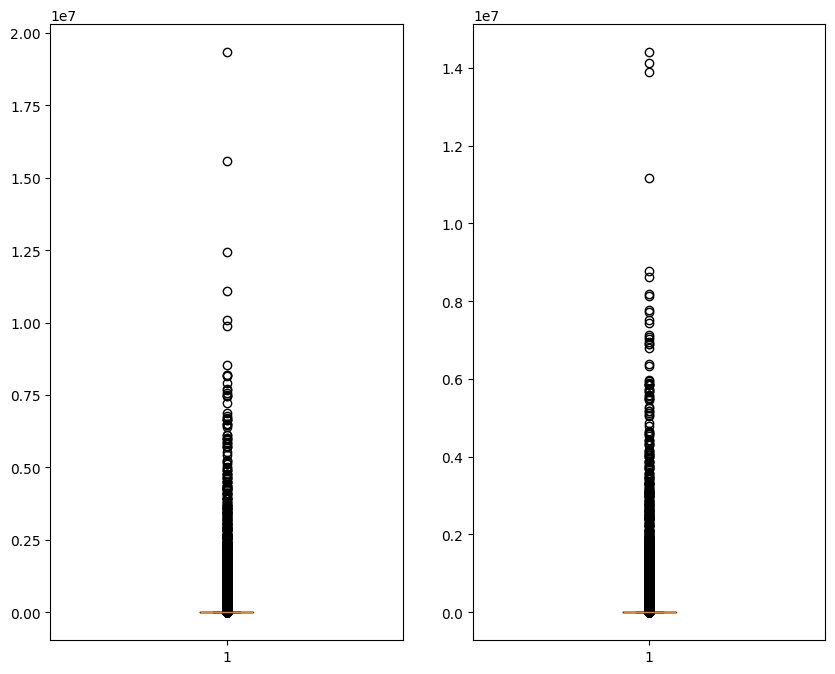

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(10, 8))
ax[0].boxplot(df['new_persons_vaccinated'])
ax[1].boxplot(df['new_persons_fully_vaccinated'])
plt.show()


1.4. populacji



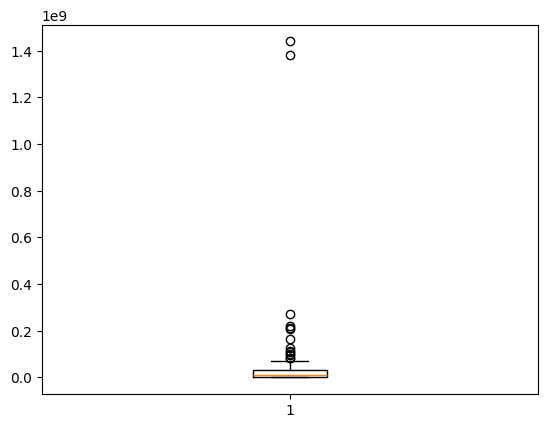

In [10]:
plt.boxplot(countries_df['population']);

1.5. PKB



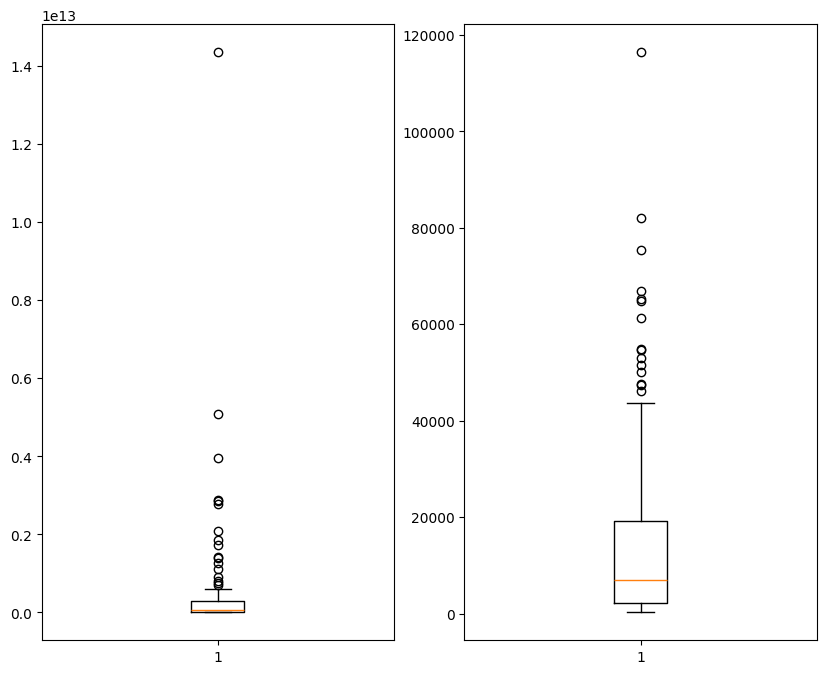

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(10, 8))
ax[0].boxplot(countries_df['gdp_usd'])
ax[1].boxplot(countries_df['gdp_per_capita_usd'])
plt.show()

1.6.1 Wydatki na służbę zdrowia

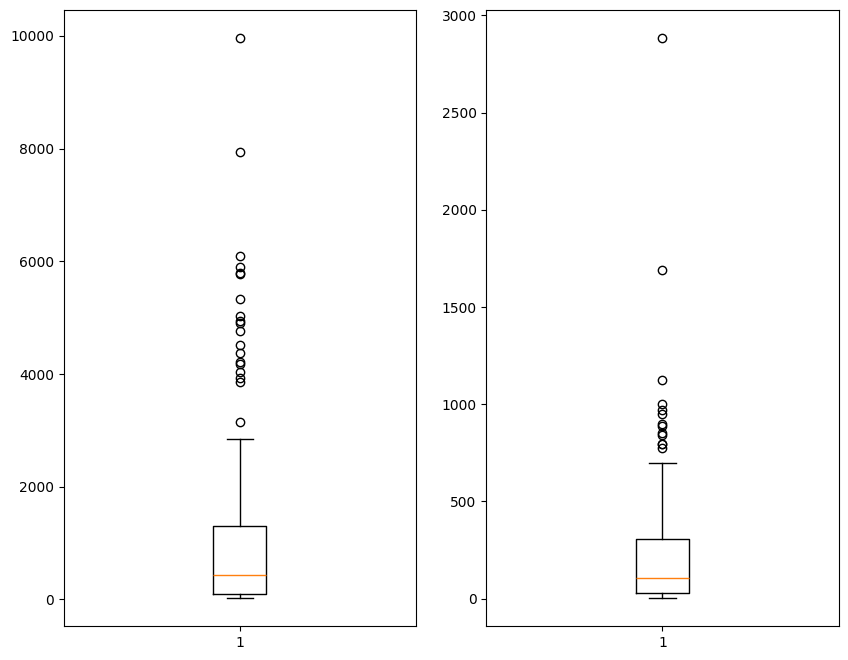

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(10, 8))
ax[0].boxplot(countries_df['health_expenditure_usd'])
ax[1].boxplot(countries_df['out_of_pocket_health_expenditure_usd'])
plt.show()

1.6.2 Zaaplikowane dawki szczepionek

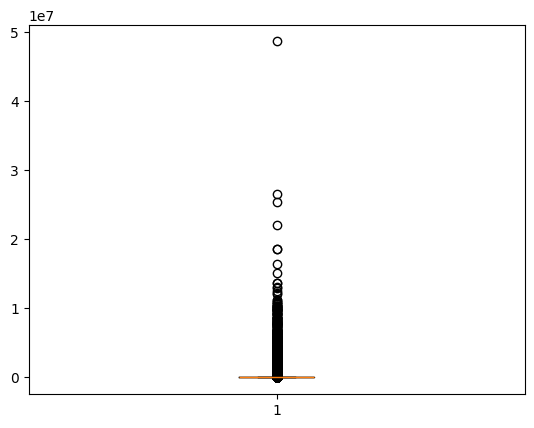

In [13]:
plt.boxplot(df['new_vaccine_doses_administered']);
plt.show()

1.6.3 liczba nowych osób przetestowanych

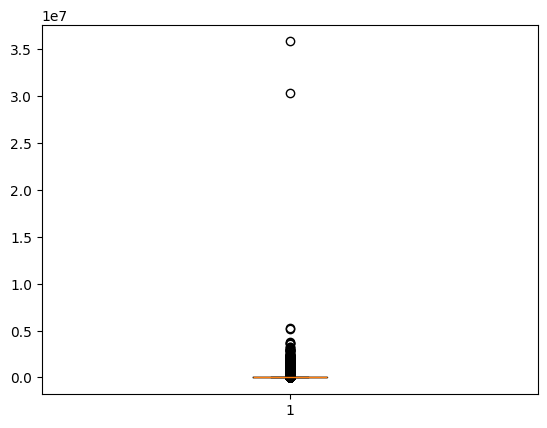

In [14]:
plt.boxplot(df['new_tested']);
plt.show()

1.6.4 ??

## Część 3

3.1. średnia liczba nowych zachorowań, śmierci i szczepień dla co najmniej 10 wybranych krajów w wybranym miesiącu

In [50]:
month = 5
year = 2021
countries = ['Italy', 'Poland', 'United States of America', 'Germany', 'Canada', 'Brazil', 'Japan', 'France', 'United Kingdom', 'China'] # ...
(
    df[
        (df['date_in_datetime'].dt.year == year) & 
        (df['date_in_datetime'].dt.month == month) &
        (df['country_name'].isin(countries))
    ]
    .groupby(['country_name'])[['new_confirmed', 'new_deceased', 'new_persons_vaccinated', 'new_persons_fully_vaccinated']]
    .mean()
    
)

,new_confirmed,new_deceased,new_persons_vaccinated,new_persons_fully_vaccinated
country_name,,,,
Brazil,4370.920930,136.755814,35050.339535,15400.280233
Canada,4.741935,48.741935,595670.354839,63688.096774
France,326.143109,4.246921,8878.722581,4700.169208
Italy,625.688207,17.155089,29607.222940,18044.248788
Japan,4957.225806,90.935484,307130.451613,97824.774194
Poland,184.323636,14.821818,14778.927273,10326.349091
United Kingdom,1023.432258,3.690323,65999.393548,139063.303226
United States of America,9608.588889,170.988889,218972.377778,378871.611111


3.2. średnia zmiana liczby zachorowań, śmierci i szczepień dla co najmniej 10 wybranych krajów w wybranym miesiącu,

In [16]:
# nw czym jest średnia zmiana

3.3. mediana liczby nowych zachorowań, śmierci i szczepień dla co najmniej 10 wybranych krajów w wybranym miesiącu,


In [17]:
(
    df[
        (df['date_in_datetime'].dt.year == year) & 
        (df['date_in_datetime'].dt.month == month) &
        (df['subregion1_code_x'].isna()) &
        (df['country_name'].isin(countries))
    ]
    .groupby(['location_key', 'country_name'])[['new_confirmed', 'new_deceased', 'new_persons_vaccinated', 'new_persons_fully_vaccinated']]
    .median()
    
)

,,new_confirmed,new_deceased,new_persons_vaccinated,new_persons_fully_vaccinated
location_key,country_name,,,,
IT,Italy,5741.0,166.0,302825.0,182114.0
PL,Poland,2908.0,296.0,256736.5,183919.5
US,United States of America,27467.5,529.5,661181.5,1111411.5


3.4. odchylenie standardowe liczby nowych zachorowań, śmierci i szczepień dla co najmniej 10 wybranych krajów w wybranym miesiącu,


In [18]:
(
    df[
        (df['date_in_datetime'].dt.year == year) & 
        (df['date_in_datetime'].dt.month == month) &
        (df['subregion1_code_x'].isna()) &
        (df['country_name'].isin(countries))
    ]
    .groupby(['location_key', 'country_name'])[['new_confirmed', 'new_deceased', 'new_persons_vaccinated', 'new_persons_fully_vaccinated']]
    .std()
    
)

,,new_confirmed,new_deceased,new_persons_vaccinated,new_persons_fully_vaccinated
location_key,country_name,,,,
IT,Italy,2933.121792,66.121377,31297.131406,42165.408654
PL,Poland,2289.656070,158.373767,40317.753950,37799.045354
US,United States of America,10097.384176,150.914717,256652.610181,608881.191458


3.5. minimalna, średnia i maksymalna liczba nowych zachorowań, szczepień i śmierci, a PKB co najmniej 10 wybranych krajów,

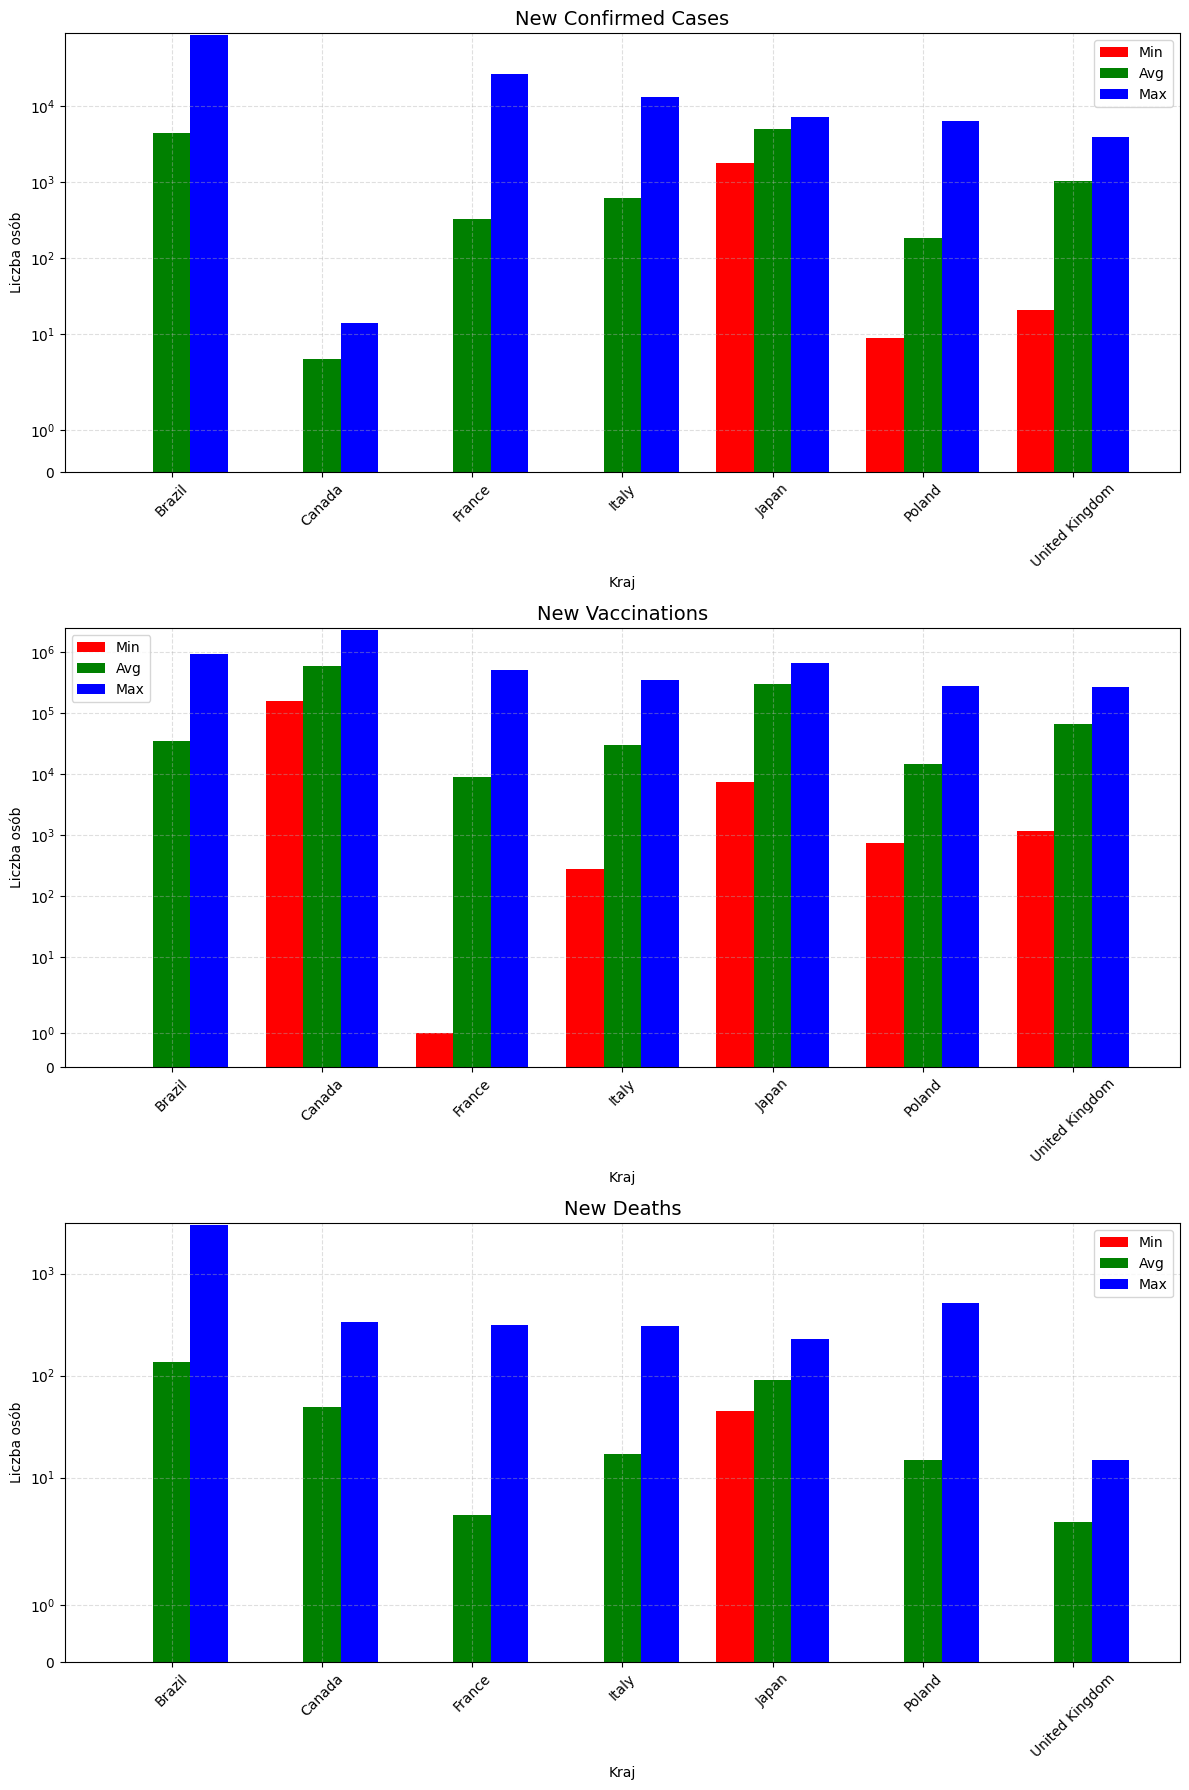

In [61]:
df = pd.read_csv('covid_combined_data.csv')
df['date_in_datetime'] = pd.to_datetime(df['date'])
df = df[(df['date_in_datetime'].dt.year == year) & 
        (df['date_in_datetime'].dt.month == month) &
        (df['country_name'].isin(countries))]

min_values = df.groupby(['country_name']).agg({'new_confirmed': 'min', 'new_persons_vaccinated': 'min', 'new_deceased': 'min'})
min_values = min_values.reset_index()
avg_values = df.groupby(['country_name']).agg({'new_confirmed': 'mean', 'new_persons_vaccinated': 'mean', 'new_deceased': 'mean'})
avg_values = avg_values.reset_index()
max_values = df.groupby(['country_name']).agg({'new_confirmed': 'max', 'new_persons_vaccinated': 'max', 'new_deceased': 'max'})
max_values = max_values.reset_index()

merged = min_values.merge(avg_values, on='country_name', suffixes=('_min', '_avg'))
merged = merged.merge(max_values, on='country_name')
merged = merged.rename(columns={
    'new_confirmed': 'new_confirmed_max',
    'new_persons_vaccinated': 'new_persons_vaccinated_max',
    'new_deceased': 'new_deceased_max'
})
merged = merged.merge(countries_df[['country_name', 'gdp_usd']], on='country_name')

metrics = ['new_confirmed', 'new_persons_vaccinated', 'new_deceased']
titles = ['New Confirmed Cases', 'New Vaccinations', 'New Deaths']
colors = ['red', 'green', 'blue']

fig, axes = plt.subplots(3, 1, figsize=(12, 18))

x = np.arange(len(merged))
width = 0.25

for i, metric in enumerate(metrics):
    ax = axes[i]

    ax.bar(x - width, merged[f'{metric}_min'], width=width, label='Min', color=colors[0])
    ax.bar(x,        merged[f'{metric}_avg'], width=width, label='Avg', color=colors[1])
    ax.bar(x + width, merged[f'{metric}_max'], width=width, label='Max', color=colors[2])

    ax.set_title(titles[i], fontsize=14)
    ax.set_ylabel('Liczba osób')
    ax.set_xlabel('Kraj')
    ax.set_xticks(x)
    ax.set_xticklabels(merged['country_name'], rotation=45)
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.4)
    ax.set_yscale('symlog')


plt.tight_layout()
plt.show()